## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#### Read RegData csv file into numpy array 

In [28]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [29]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [30]:
X=data[:,0]
y=data[:,1]

#### Explore your data

In [31]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [32]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

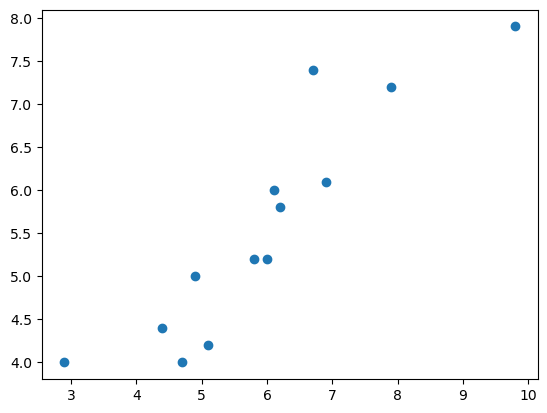

In [33]:
plt.scatter(X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [34]:
theta_0=0
theta_1=0
lr=0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [35]:
h=theta_0+theta_1*X
print(f'h(x): {h}')

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [36]:
m=len(data)
# error vector
error_vector = h - y

# MSE
J = np.sum(error_vector**2) / (2 * m)

print(f'Error Vector: {error_vector}')
print(f'j = {J}')

Error Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j = 16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [37]:
theta_0_grad=sum((h-y))/m
theta_1_grad=sum((h-y)*X)/m

print(f'd_theta_0: {theta_0_grad}',f'\nd_theta_1: {theta_1_grad}' )

d_theta_0: -5.569230739769231 
d_theta_1: -35.043846043215375


### Step5: Update the parameters (simultaneously).

In [38]:
new_theta_0=theta_0-lr*theta_0_grad
new_theta_1=theta_1-lr*theta_1_grad

print(f'theta_0_new : {new_theta_0}',f'\ntheta_1_new : {new_theta_1}' )

theta_0_new : 0.005569230739769231 
theta_1_new : 0.03504384604321537


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [13]:
# Now all together..
# Step one: Initialize parameters (theta_0 & theta_1)
n_iter=1000
theta_0=0
theta_1=0
lr=0.01
m=len(data)

# To save losses and theta
losses=[]
theta_0_all=[]
theta_1_all=[]


for i in range(n_iter):
    # We need to append theta First due to initilaization 
    theta_0_all.append(theta_0)
    theta_1_all.append(theta_1)

    # Step two: predicate on initila theta
    h=theta_0+theta_1*X
    
    # Step three: calculate J & Error Vector 
    error_vector = h - y
    J = np.sum(error_vector**2) / (2 * m)
    losses.append(J)
    
    # Step four: calculate gradient for our weights
    theta_0_grad=sum((h-y))/m
    theta_1_grad=sum((h-y)*X)/m
    
    # Gradient vector norm
    grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
    
    # Step Five: Update our weights
    theta_0=theta_0-lr*theta_0_grad
    theta_1=theta_1-lr*theta_1_grad
    
    # Print iteration details
    
    print(f"****************** Iteration {i} ********************")
    print(f"\nh(x): {h}\n")
    print(f"Error Vector:\n{error_vector}\n")
    print(f"J = {J}\n")
    print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
    print(f"Gradient Vector Norm: {grad_vector}\n")
    print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J = 16.305384479692318

Gradient Vector:
[[-5.569230739769231]
 [-35.043846043215375]]

Gradient Vector Norm: 35.483622652335995

theta_0_new: 0.05569230739769231
theta_1_new: 0.35043846043215376

****************** Iteration 1 ********************

h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

J = 6.175608808043304

Gradient Vector:
[[-3.4270817500338526]
 [-21.338452630007847]]

Gradient Vector Norm: 21.61190528307266

theta_0_new: 0.089

In [44]:
# # Now all together..
# # Step one: Initialize parameters (theta_0 & theta_1)
# n_iter=1000
# theta_0=0
# theta_1=0
# lr=0.01
# m=len(data)

# # To save losses and theta
# losses=[]
# theta_0_all=[]
# theta_1_all=[]


# for i in range(n_iter):
#     # We need to append theta First due to initilaization 
#     theta_0_all.append(theta_0)
#     theta_1_all.append(theta_1)

#     # Step two: predicate on initila theta
#     h=theta_0+theta_1*X
    
#     # Step three: calculate J & Error Vector 
#     error_vector = h - y
#     J = np.sum(error_vector**2) / (2 * m)
#     losses.append(J)
    
#     # Step four: calculate gradient for weights
#     theta_0_grad=sum((h-y))/m
#     theta_1_grad=sum((h-y)*X)/m
    
#     # Gradient vector norm
#     grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
    
#      # Convergence check
#     if (grad_vector < 0.1) or ((i != 0) and (abs(losses[i - 1] - J) < 0.000001)):
#         break
    
#     # Step Five: Update weights
#     theta_0=theta_0-lr*theta_0_grad
#     theta_1=theta_1-lr*theta_1_grad
    
#     # Print iteration Like (verbose) in fit 
    
#     print(f"****************** Iteration {i} ********************")
#     print(f"\nh(x): {h}\n")
#     print(f"Error Vector:\n{error_vector}\n")
#     print(f"J = {J}\n")
#     print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
#     print(f"Gradient Vector Norm: {grad_vector}\n")
#     print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")
    
# # Training report
# print("****************** Training Report ********************\n")
# print(f"Gradient Descent converged after {i} iterations\n")
# print(f"theta_0_Opt: {theta_0}\ntheta_1_Opt: {theta_1}\n")

# # Final h with error_vector
# error_vector = (theta_0 + theta_1 * X )- y

# # Final Cost
# final_cost = np.sum(error_vector**2) / (2 * m)

# # predictions
# final_predictions = theta_0 + theta_1 * X

# # report
# print(f"Error Vector:\n{error_vector}\n")
# print(f"Cost = {final_cost}\n")
# print("h(x) = y_predict:")
# print(final_predictions)
# print("\ny_actual:")
# print(y)

In [59]:
# creat as function 
def gradient_descent_fun(X, y, n_iter=1000, lr=0.01,convergance_rate=0.000001,norm_value_check=0.0001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []

    for i in range(n_iter):
        # We need to append theta First due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Step two: Predict using initial theta
        h = theta_0 + theta_1 * X

        # Step three: Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Step four: Calculate gradient for weights
        theta_0_grad=sum((h-y))/m
        theta_1_grad=sum((h-y)*X)/m

        # Gradient vector norm
        grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))

        # Convergence check
        if (grad_vector < norm_value_check) or ((i != 0) and (abs(losses[i - 1] - J) < convergance_rate)):
            break

        # Step Five: Update our weights
        theta_0 = theta_0 - lr * theta_0_grad
        theta_1 = theta_1 - lr * theta_1_grad

        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
        print(f"Gradient Vector Norm: {grad_vector}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")
        
    # Training report
    print("****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {i} iterations\n")
    print(f"theta_0_Opt: {theta_0}\ntheta_1_Opt: {theta_1}\n")

    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y

    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)

    # predictions
    final_predictions = theta_0 + theta_1 * X
    # Report
    print(f"Error Vector:\n{error_vector}\n")
    print(f"Cost = {final_cost}\n")
    print("h(x) = y_predict:")
    print(final_predictions)
    print("\ny_actual:")
    print(y)
    return losses, theta_0_all, theta_1_all,final_predictions

In [40]:
losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=1000, lr=0.01)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J = 16.305384479692318

Gradient Vector:
[[-5.569230739769231]
 [-35.043846043215375]]

Gradient Vector Norm: 35.483622652335995

theta_0_new: 0.05569230739769231
theta_1_new: 0.35043846043215376

****************** Iteration 1 ********************

h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

J = 6.175608808043304

Gradient Vector:
[[-3.4270817500338526]
 [-21.338452630007847]]

Gradient Vector Norm: 21.61190528307266

theta_0_new: 0.089

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [41]:
print("h(x) = y_predict:")
print(final_predictions)

print("\ny_actual:")
print(y)

h(x) = y_predict:
[2.74498295 6.14196626 4.53286904 7.21469817 8.91319004 6.32075512
 5.60560052 5.69499474 5.5162063  4.71165748 4.35408017 4.08589751
 5.33741786]

y_actual:
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

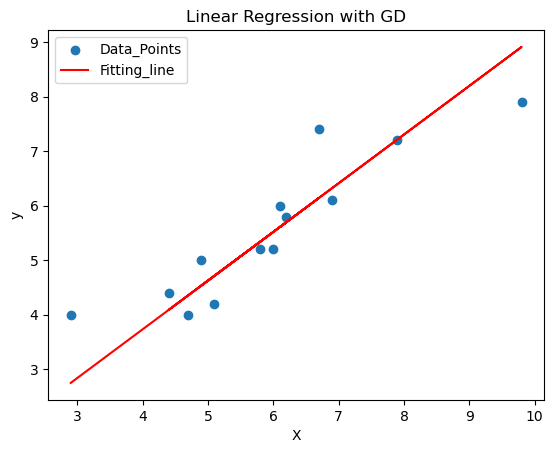

In [42]:
y_pred=final_predictions
# Data points
plt.scatter(X, y, label='Data_Points')

# fitting line
plt.plot(X, y_pred, color='red', label='Fitting_line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with GD')
plt.legend()


#### Use R2 score to evaluate LR equation output
https://www.youtube.com/watch?v=KccCy0hu-dM

In [44]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7480324921408193

In [62]:
losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=6000, lr=0.01,convergance_rate=0.000001)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J = 16.305384479692318

Gradient Vector:
[[-5.569230739769231]
 [-35.043846043215375]]

Gradient Vector Norm: 35.483622652335995

theta_0_new: 0.05569230739769231
theta_1_new: 0.35043846043215376

****************** Iteration 1 ********************

h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

J = 6.175608808043304

Gradient Vector:
[[-3.4270817500338526]
 [-21.338452630007847]]

Gradient Vector Norm: 21.61190528307266

theta_0_new: 0.089

****************** Iteration 1609 ********************

h(x): [3.21689136 6.10741902 4.73822182 7.02021751 8.46548152 6.25955228
 5.65101995 5.7270864  5.5749535  4.89035472 4.58608855 4.3578892
 5.4228206 ]

Error Vector:
[-0.78310864 -1.29258108 -0.26177818 -0.1797823   0.56548143  0.15955237
 -0.34898005 -0.07291379  0.37495369  0.69035491  0.58608855 -0.04211089
  0.22282079]

J = 0.14881948389200492

Gradient Vector:
[[-0.02938486075410173]
 [0.004592708103821388]]

Gradient Vector Norm: 0.029741604012979105

theta_0_new: 1.011255966149639
theta_1_new: 0.7606193032503167

****************** Iteration 1610 ********************

h(x): [3.21705202 6.10740515 4.73829062 7.02014853 8.46532528 6.25952923
 5.65103364 5.7270955  5.57497179 4.89041434 4.58616655 4.35798097
 5.42284807]

Error Vector:
[-0.78294798 -1.29259494 -0.26170938 -0.17985127  0.56532519  0.15952933
 -0.34896636 -0.07290469  0.37497198  0.69041453  0.58616655 -0.04201912
  0.22284826]

J = 0.14881064133326335

Gradie

In [63]:
y_pred=final_predictions
r2_score(y,y_pred)

0.8204137471499834

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [29]:
losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=1000, lr=0.01)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J = 16.305384479692318

Gradient Vector:
[[-5.56923073976923]
 [-35.04384604321538]]

Gradient Vector Norm: 35.483622652336

theta_0_new: 0.0556923073976923
theta_1_new: 0.3504384604321538

****************** Iteration 1 ********************

h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

J = 6.175608808043303

Gradient Vector:
[[-3.427081750033852]
 [-21.338452630007843]]

Gradient Vector Norm: 21.611905283072655

theta_0_new: 0.0899631248

### Plot loss vs. iterations

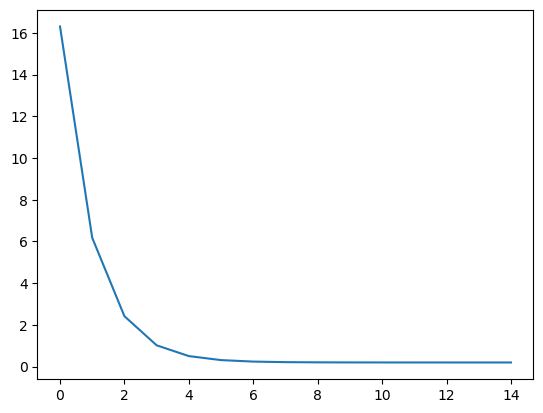

In [30]:
plt.plot(losses)

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [4]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [5]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [6]:
X2=data2[:,:3]
y2=data2[:,-1]

In [7]:
y2.shape

(25,)

In [8]:
y2=y2.reshape(-1,1)

In [9]:
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [10]:
y2

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [11]:
m=len(y2)
ones=np.ones((m,1))
X2=np.concatenate((ones,X2),axis=1)
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [19]:
# Step one: Initialize parameters (theta_0 & theta_1)
n_iter=10000
thetas=np.zeros((4,1))
lr=0.0001
m=len(y2)

# To save losses and theta
losses=[]
all_thetaas=[]


for i in range(n_iter):
    # We need to append theta First due to initilaization 
    all_thetaas.append(thetas)

    # Step two: predicate on initila theta
    h=X2@thetas
    h=h.reshape(-1,1)

    # Step three: calculate J & Error Vector 
    error = h - y2
    J = np.sum(error**2) / (2 * m)
    losses.append(J)
    
    # Step four: calculate gradient for weights
    grad_vector=(X2.T@error)/m #( n X m ), (m,1) 
    
    # Gradient vector norm
    grad_vector_norm = np.linalg.norm(grad_vector)
    
     # Convergence check
    if (grad_vector_norm < 0.2) or ((i != 0) and (abs(losses[i - 1] - J) < 0.000001)):
        break
    
    # Step Five: Update weights
    thetas=thetas-lr*grad_vector
    
     # Print
    print(f"****************** Iteration {i} ********************")
    print(f"\nh(x):\n{h}\n")
    print(f"Error Vector:\n{error}\n")
    print(f"J = {J}\n")
    print(f"Gradient Vector:\n{grad_vector}\n")
    print(f"Gradient Vector Norm: {grad_vector_norm}\n")
    print(f"thetas_new :\n{thetas}\n")


****************** Iteration 0 ********************

h(x):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]

J = 13405.98

Gradient Vector:
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

Gradient Vector Norm: 22917.545989219703

thetas_new :
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]

****************** Iteration 1 ********************

h(x):
[[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [341.507404]
 [340

****************** Iteration 847 ********************

h(x):
[[152.89744467]
 [184.89472108]
 [181.51406737]
 [198.72934903]
 [140.42736755]
 [105.27624588]
 [149.99542174]
 [112.89756324]
 [174.33656364]
 [163.89149644]
 [143.77320412]
 [142.6611036 ]
 [186.47591735]
 [153.59236115]
 [150.96879015]
 [188.51864983]
 [145.35404065]
 [180.41087388]
 [177.43813743]
 [158.83266307]
 [175.68339191]
 [174.40592969]
 [167.10616046]
 [151.70644308]
 [190.951577  ]]

Error Vector:
[[ 0.89744467]
 [-0.10527892]
 [ 1.51406737]
 [ 2.72934903]
 [-1.57263245]
 [ 4.27624588]
 [ 0.99542174]
 [-2.10243676]
 [-0.66343636]
 [-0.10850356]
 [ 2.77320412]
 [ 1.6611036 ]
 [ 2.47591735]
 [ 1.59236115]
 [ 2.96879015]
 [-3.48135017]
 [-1.64595935]
 [-2.58912612]
 [ 0.43813743]
 [-0.16733693]
 [-1.31660809]
 [-0.59407031]
 [-7.89383954]
 [ 2.70644308]
 [-1.048423  ]]

J = 3.193715225479494

Gradient Vector:
[[ 0.06957936]
 [ 1.33256324]
 [ 0.32598443]
 [-1.61445699]]

Gradient Vector Norm: 2.1197413337131614

th

In [66]:
# >>>>> FOR Testttt

# n_iter=1000
# thetas=np.zeros((4,1))
# lr=0.00001
# m=len(y2)

# h=X2@thetas
# h=h.reshape(-1,1)
# error_vector = h - y2
# J = np.sum(error_vector**2) / (2 * m)
# losses.append(J)

# grad_vector=(X2.T@error_vector)/m
# print(grad_vector,J)

# h=h.reshape(-1,1)
# h

#### Predict y values using the LR equation 
##### X@thetas

In [23]:
y_predicate= X2@thetas
print(f"h(x) = y_predict: \n{y_predicate}")
print(f"y= \n{y2}")

h(x) = y_predict: 
[[152.91187576]
 [184.64148   ]
 [181.38435406]
 [198.84369891]
 [139.95304538]
 [105.28360258]
 [150.53278872]
 [113.93687834]
 [174.34648329]
 [164.43769847]
 [143.9475374 ]
 [142.80976398]
 [186.07612057]
 [152.87430111]
 [151.49602251]
 [188.52991488]
 [144.27531239]
 [181.2828888 ]
 [177.05793719]
 [158.56687605]
 [176.18612307]
 [174.4337531 ]
 [167.53536426]
 [151.10566076]
 [190.61213477]]
y= 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Plot loss vs. iterations

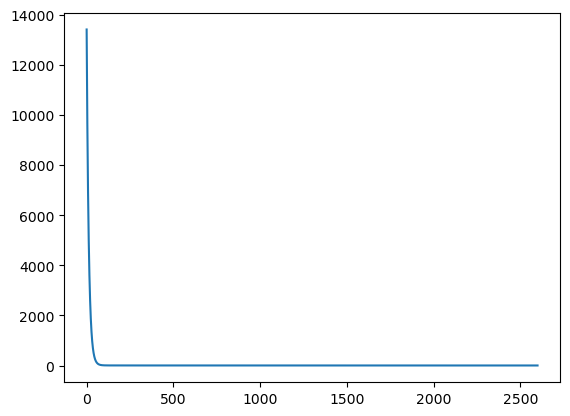

In [24]:
plt.plot(losses)

#### Use R2 score to evaluate LR equation output

In [26]:
from sklearn.metrics import r2_score
r2_score(y2,y_predicate)

0.989006856377234